In [1]:
!pip install python-dotenv

In [3]:
!pip install yfinance==0.1.74

In [4]:
!pip install mplcyberpunk

In [1]:
import pandas as pd
import datetime
import yfinance as yf
from matplotlib import pyplot as plt
import mplcyberpunk
import smtplib
from email.message import EmailMessage

In [2]:
# Chamando os ativos que desejamos no Yahoo Finance, nesse caso serão o Ibov, dolar e euro

ativos = ('BRL=X', 'EURBRL=X')

hoje = datetime.datetime.now()
um_ano_atras = hoje - datetime.timedelta(days = 365) #para fazer de hoje até 1 ano atrás

dados_mercado = yf.download(ativos, um_ano_atras, hoje)

dados_mercado




[*********************100%***********************]  2 of 2 completed


Adj Close            Close             High                Low  \
               BRL=X EURBRL=X   BRL=X EURBRL=X   BRL=X EURBRL=X     BRL=X   
Date                                                                        
2022-04-06    4.6507   5.0703  4.6507   5.0703  4.7126   5.1429  4.647900   
2022-04-07    4.7152   5.1357  4.7152   5.1357  4.7699   5.1980  4.690400   
2022-04-08    4.7521   5.1606  4.7521   5.1606  4.7913   5.1913  4.707518   
2022-04-11    4.6981   5.1049  4.6981   5.1049  4.7326   5.1566  4.684016   
2022-04-12    4.6936   5.1035  4.6936   5.1035  4.6971   5.1086  4.621500   
...              ...      ...     ...      ...     ...      ...       ...   
2023-03-31    5.0927   5.5518  5.0927   5.5518  5.1033   5.5615  5.055200   
2023-04-03    5.0623   5.4856  5.0623   5.4856  5.0755   5.5231  5.036216   
2023-04-04    5.0631   5.5201  5.0631   5.5201  5.0976   5.5813  5.048277   
2023-04-05    5.0707   5.5538  5.0707   5.5538  5.0743   5.5599  5.027504   
2023-04-06    5.0551   5.5111  5.0551   5.5111  5.0552   5.5119  5.034000   

                       Open          Volume           
           EURBRL=X   BRL=X EURBRL=X  BRL=X EURBRL=X  
Date                                                  
2022-04-06   5.0517  4.6507   5.0684      0        0  
2022-04-07   5.1134  4.7152   5.1380      0        0  
2022-04-08   5.1134  4.7521   5.1572      0        0  
2022-04-11   5.1004  4.6980   5.1049      0        0  
2022-04-12   5.0326  4.6936   5.1051      0        0  
...             ...     ...      ...    ...      ...  
2023-03-31   5.4891  5.0927   5.5523      0        0  
2023-04-03   5.4603  5.0623   5.4616      0        0  
2023-04-04   5.5023  5.0631   5.5189      0        0  
2023-04-05   5.4953  5.0707   5.5543      0        0  
2023-04-06   5.4814  5.0340   5.4900      0        0  

[262 rows x 12 columns]

In [4]:
dados_fechamento = dados_mercado['Adj Close'] 
dados_fechamento.columns = ['dolar','euro'] #alterando os nomes das colunas
dados_fechamento = dados_fechamento.dropna()


display(dados_fechamento)

,dolar,euro
Date,,
2022-04-06,4.6507,5.0703
2022-04-07,4.7152,5.1357
2022-04-08,4.7521,5.1606
2022-04-11,4.6981,5.1049
2022-04-12,4.6936,5.1035
...,...,...
2023-03-31,5.0927,5.5518
2023-04-03,5.0623,5.4856
2023-04-04,5.0631,5.5201


In [26]:
dados_ult_dolar = dados_fechamento.iloc[-1,0]

dados_ult_euro = dados_fechamento.iloc[-1,1]


5.055099964141846

In [31]:
dados_ult_dolar = round(dados_ult_dolar, 2)

dados_ult_euro = round(dados_ult_euro, 2)

dados_ult_dolar

5.06

# Agora será necessário criar com outros timeframes

In [5]:
# utilizando o "resample"

dados_fechamento_mensal = dados_fechamento.resample('M').last() #colocamos a letra M para simbolizar mês, e last para pegar o último valor
dados_fechamento_anual = dados_fechamento.resample('A').last()


dados_fechamento_anual

,dolar,euro
Date,,
2022-12-31,5.2846,5.6330
2023-12-31,5.0551,5.5111


# Calcularemos o fechamento, retorno anual e retorno mensal


In [6]:
## pct_change serve para calcular a porcentagem de retorno 
retorno_ano = dados_fechamento_anual.pct_change().dropna()
retorno_mes = dados_fechamento_mensal.pct_change().dropna()
retorno_dia = dados_fechamento.pct_change().dropna()

retorno_dia

,dolar,euro
Date,,
2022-04-07,0.013869,0.012899
2022-04-08,0.007826,0.004848
2022-04-11,-0.011363,-0.010793
2022-04-12,-0.000958,-0.000274
2022-04-13,-0.004368,-0.009229
...,...,...
2023-03-31,-0.008083,-0.002372
2023-04-03,-0.005969,-0.011924
2023-04-04,0.000158,0.006289


In [16]:
# Localizar fechamento do dia anterior, retorno no mês e retorno no ano 
# usando 'iloc' que seleciona elementos como uma matriz

retorno_dia_dolar = retorno_dia.iloc[-1, 0]
retorno_dia_euro = retorno_dia.iloc[-1, 1]


retorno_mes_dolar = retorno_mes.iloc[-1, 0]
retorno_mes_euro = retorno_mes.iloc[-1, 1]


retorno_ano_dolar = retorno_ano.iloc[-1, 0]
retorno_ano_euro = retorno_ano.iloc[-1, 1]




retorno_dia_euro

-0.007688481735852792

In [17]:
# arredondados o número do fechamento do dia anterior, retorno no mês e retorno no ano para torna-los melhor compreensíveis 

retorno_dia_dolar = round(retorno_dia_dolar * 100, 2)
retorno_dia_euro = round(retorno_dia_euro * 100, 2)

retorno_mes_dolar = round(retorno_mes_dolar * 100, 2)
retorno_mes_euro = round(retorno_mes_euro * 100, 2)

retorno_ano_dolar = round(retorno_ano_dolar * 100, 2)
retorno_ano_euro = round(retorno_ano_euro * 100, 2)


# Gráficos

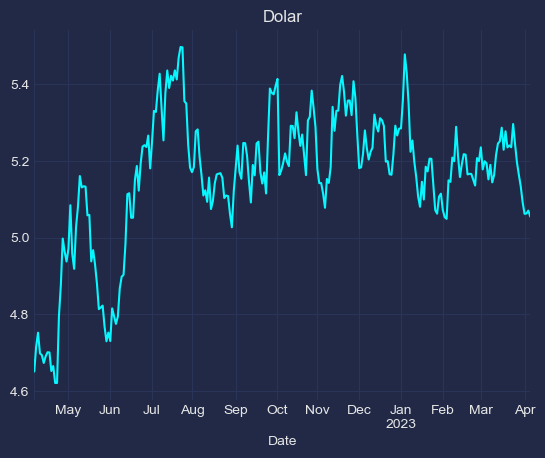

In [10]:
plt.style.use("cyberpunk")

dados_fechamento.plot(y = 'dolar', use_index = True, legend = False)
plt.title('Dolar')
plt.savefig('dolar.png', dpi = 300)

plt.show()

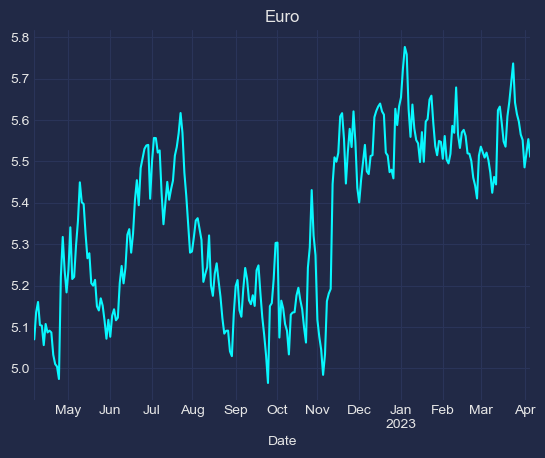

In [11]:
plt.style.use("cyberpunk")

dados_fechamento.plot(y = 'euro', use_index = True, legend = False)
plt.title('Euro')
plt.savefig('euro.png', dpi = 300)

plt.show()

# Bora Mandar o e-mail

In [12]:
import os
from dotenv import load_dotenv



In [13]:
load_dotenv() #no arquivo tem que estar "senha=..." e salvar como .env


True

In [14]:
senha = os.environ.get("senha")
email = 'csampaion@gmail.com'

Nesse eu criei as variáveis 'dados_ult_dolar' e 'dados_ult_euro' para puxar o valor em reais do fechamento do dia anterior:

In [35]:
msg = EmailMessage()
msg['Subject'] = "Enviando e-mail com o Python"
msg['From'] = 'csampaion@gmail.com'
msg['To'] = 'brenno@varos.com.br'

msg.set_content(f'''Brenão, segue o relatório diário:

Fiz alterando o fechamento para o valor em reais e não em porcentagem, espero que esteja correto.

Dólar:

No ano o Dólar está tendo uma rentabilidade de {retorno_ano_dolar}%, 
enquanto no mês a rentabilidade é de {retorno_mes_dolar}%.

No último dia útil, o fechamento do Dólar foi de R${dados_ult_dolar}.

Arrisquei em fazer para euro também, estou buscando uma melhor cotação para uma viagem.

Euro:

No ano o Dólar está tendo uma rentabilidade de {retorno_ano_euro}%, 
enquanto no mês a rentabilidade é de {retorno_mes_euro}%.

No último dia útil, o fechamento do Euro foi de R${dados_ult_euro}.


Abs,

Cesar

''')

In [36]:
with open('dolar.png', 'rb') as content_file:
    content = content_file.read()
    msg.add_attachment(content, maintype='application', subtype='png', filename='dolar.png')
    
    
with open('euro.png', 'rb') as content_file:
    content = content_file.read()
    msg.add_attachment(content, maintype='application', subtype='png', filename='euro.png')

In [37]:
with smtplib.SMTP_SSL('smtp.gmail.com', 465) as smtp:
    
    smtp.login(email, senha)
    smtp.send_message(msg)